In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import graphviz
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings("ignore")
import prep

In [2]:
# Get churn data from customers table
df = pd.read_csv('telco_churn_customers.csv')
df = prep.prep_telco(df)

In [3]:
df.head()

,customer_id,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,churn,tenure_year,household_type_id,streaming_services,phone_id,online_security_backup,gender,device_protection,tech_support,paperless_billing
0,0002-ORFBO,0,9,1,2,2,65.6,593.30,0,0.75,3,2,1,2,0,0,2,1
1,0003-MKNFE,0,9,1,1,2,59.9,542.40,0,0.75,0,1,2,1,1,0,0,0
2,0004-TLHLJ,0,4,2,1,1,73.9,280.85,1,0.33,0,0,1,1,1,2,0,1
3,0011-IGKFF,1,13,2,1,1,98.0,1237.85,1,1.08,2,3,1,2,1,2,0,1
4,0013-EXCHZ,1,3,2,1,2,83.9,267.40,1,0.25,2,2,1,1,0,0,2,1


Write a function, peekatdata(dataframe), that takes a dataframe as input and computes and returns the following:

creates dataframe object head_df (df of the first 5 rows) and prints contents to screen

creates dataframe object tail_df (df of the last 5 rows) and prints contents to screen

creates tuple object shape_tuple (tuple of (nrows, ncols)) and prints tuple to screen

creates dataframe object describe_df (summary statistics of all numeric variables) and prints contents to screen.

prints to screen the information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [4]:
def peekatdata(dataframe):
    head_df = df.head()
    tail_df = df.tail()
    head_tail = head_df.append(tail_df)
    print('Head and Tail\n\n', head_tail)
    print('--'*55)
    shape_tuple = df.shape
    print('Shape\n\n', shape_tuple)
    print('--'*20)
    describe_df = df.describe()
    print('Describe\n\n', describe_df)
    print('--'*20)
    print('Index\n\n', df.index)
    print('--'*20)
    print('Data Types\n\n', df.dtypes)
    print('--'*20)
    print('Null Value Count\n\n', df.isnull().sum())
    print('--'*55)
    print('Memory\n\n', df.memory_usage)

In [5]:
def df_value_counts(df):
    for col in df.columns: 
        n = df[col].unique().shape[0] 
        col_bins = min(n,10) 
        if df[col].dtype in ['int64','float64'] and n > 10:
            print('%s:' % col)
            print(df[col].value_counts(bins=col_bins, sort=False)) 
        else: 
            print(df[col].value_counts()) 
        print('\n')

# df_value_counts(df)

In [6]:
# Split the data into train (70%) & test (30%) samples.
X = df.drop(['churn'], axis=1)
y = df[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

X_train.head()

,customer_id,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,tenure_year,household_type_id,streaming_services,phone_id,online_security_backup,gender,device_protection,tech_support,paperless_billing
1479,2187-PKZAY,0,12,2,1,3,79.95,1043.40,1.00,0,1,1,1,1,0,0,1
2377,3402-XRIUO,1,22,1,1,2,63.55,1381.80,1.83,2,0,2,4,0,0,2,1
6613,9397-TZSHA,0,69,3,3,4,24.60,1678.05,5.75,0,0,2,0,0,1,1,0
6468,9153-BTBVV,0,71,3,3,3,25.00,1753.00,5.92,2,0,2,0,0,1,1,0
2668,3793-MMFUH,1,13,2,1,1,95.05,1290.00,1.08,0,3,2,1,0,0,0,1


In [7]:
# Numeric Scaling: scale the monthly_charges and total_charges data. Make sure that the parameters for scaling 
# are learned from the training data set.
scaler = MinMaxScaler()
scaler.fit(X_train[['monthly_charges', 'total_charges']])

X_train[['monthly_charges', 'total_charges']] = scaler.transform(X_train[['monthly_charges', 'total_charges']])
X_test[['monthly_charges', 'total_charges']] = scaler.transform(X_test[['monthly_charges', 'total_charges']])

train[['monthly_charges', 'total_charges']] = scaler.transform(train[['monthly_charges', 'total_charges']])
test[['monthly_charges', 'total_charges']] = scaler.transform(test[['monthly_charges', 'total_charges']])

# Data Exploration

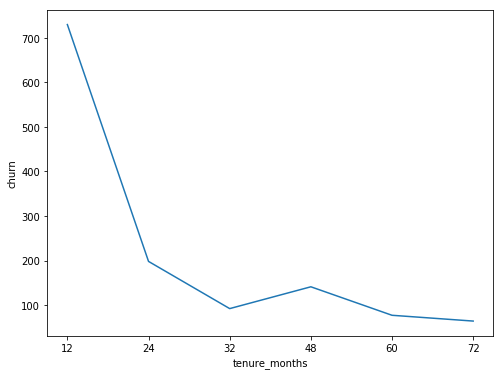

In [8]:
# Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a 
# cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart 
# where x is the tenure and y is the rate of churn (customers churned/total customers)).

bins = [12, 24, 32, 48, 60, 72]
train['tenure_months'] = pd.cut(train['tenure'], bins)

bins = [0, 12, 24, 32, 48, 60, 72]
labels = ['12', '24', '32', '48', '60', '72']
train['tenure_months'] = pd.cut(train['tenure'], bins=bins, labels=labels).where(train.churn == 1)

df1 = train.groupby('tenure_months')['churn'].count()
df1 = pd.DataFrame(df1)
df1 = df1.reset_index()
df1

plt.figure(figsize=(8,6))
ax = sns.lineplot(x="tenure_months", y="churn",data=df1)

In [9]:
# If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers
# after the 12th month, are those rates comparable?

mtm = train[train.contract_type_id == 1]
mtm_after12 = mtm[mtm.tenure_year > 1]

mtmc = mtm_after12.churn.value_counts()
mtmc

print('Rate of churn for month-to-month: {:.2%}'.format(mtmc[1]/(mtmc[0]+mtmc[1])))

one_year = train[train.contract_type_id == 2]
one_year_after12 = one_year[one_year.tenure_year > 1]

one_yearc = one_year_after12.churn.value_counts()
one_yearc

print('Rate of churn for 1+ years: {:.2%}'.format(one_yearc[1]/(one_yearc[0]+one_yearc[1])))

Rate of churn for month-to-month: 32.75%
Rate of churn for 1+ years: 11.12%


In [10]:
# Crosstab
# barplot
# joint plot
# dist plot or hist
# plt.plot

In [11]:
train['cumsum_churn'] = train.churn.cumsum()

In [12]:
train['rate_churn'] = train.cumsum_churn/train.churn.count()

In [13]:
pd.crosstab(train.churn, train.contract_type_id, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


contract_type_id,1,2,3,All
churn,,,,
0,0.32069,0.180122,0.235091,0.735903
1,0.233874,0.0225152,0.00770791,0.264097
All,0.554564,0.202637,0.242799,1


In [14]:
pd.crosstab(train.churn, train.internet_service_type_id, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


internet_service_type_id,1,2,3,All
churn,,,,
0,0.28499,0.251927,0.198986,0.735903
1,0.0675456,0.181136,0.0154158,0.264097
All,0.352535,0.433063,0.214402,1


In [15]:
pd.crosstab(train.churn, train.senior_citizen, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


senior_citizen,0,1,All
churn,,,
0,0.642596,0.0933063,0.735903
1,0.195943,0.0681542,0.264097
All,0.83854,0.16146,1


In [16]:
pd.crosstab(train.churn, train.household_type_id, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


household_type_id,0,1,2,3,All
churn,,,,,
0,0.308114,0.0393509,0.172211,0.216227,0.735903
1,0.155781,0.010142,0.0622718,0.0359026,0.264097
All,0.463895,0.0494929,0.234483,0.25213,1


In [17]:
pd.crosstab(train.churn, train.gender, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


gender,0,1,All
churn,,,
0,0.366734,0.369168,0.735903
1,0.130426,0.133671,0.264097
All,0.49716,0.50284,1


In [18]:
pd.crosstab(train.churn, train.tech_support, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


tech_support,0,1,2,All
churn,,,,
0,0.288641,0.198986,0.248276,0.735903
1,0.202028,0.0154158,0.0466531,0.264097
All,0.490669,0.214402,0.294929,1


In [19]:
pd.crosstab(train.churn, train.device_protection, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


device_protection,0,1,2,All
churn,,,,
0,0.271805,0.198986,0.265112,0.735903
1,0.173225,0.0154158,0.0754564,0.264097
All,0.44503,0.214402,0.340568,1


In [20]:
pd.crosstab(train.churn, train.paperless_billing, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


paperless_billing,0,1,All
churn,,,
0,0.340974,0.394929,0.735903
1,0.0703854,0.193712,0.264097
All,0.411359,0.588641,1


In [21]:
pd.crosstab(train.churn, train.phone_id, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


phone_id,0,1,2,All
churn,,,,
0,0.0738337,0.364909,0.29716,0.735903
1,0.0247465,0.12211,0.117241,0.264097
All,0.0985801,0.487018,0.414402,1


In [22]:
pd.crosstab(train.churn, train.streaming_services, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


streaming_services,0,1,2,3,All
churn,,,,,
0,0.389452,0.0778905,0.0758621,0.192698,0.735903
1,0.116633,0.0346856,0.0352941,0.0774848,0.264097
All,0.506085,0.112576,0.111156,0.270183,1


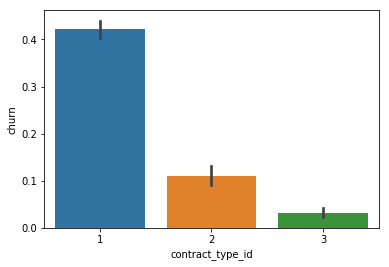

In [23]:
# barplot
ax = sns.barplot(x="contract_type_id", y="churn", data=train)

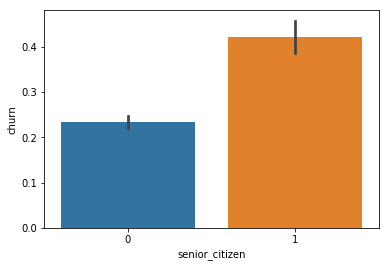

In [24]:
# barplot
ax = sns.barplot(x="senior_citizen", y="churn", data=train)

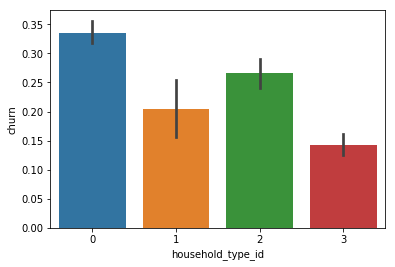

In [25]:
# barplot
ax = sns.barplot(x="household_type_id", y="churn", data=train)

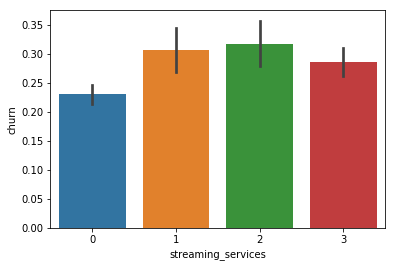

In [26]:
# barplot
ax = sns.barplot(x="streaming_services", y="churn", data=train)

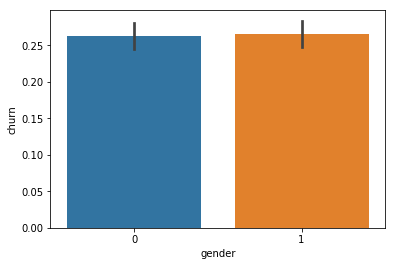

In [27]:
# barplot
ax = sns.barplot(x="gender", y="churn", data=train)

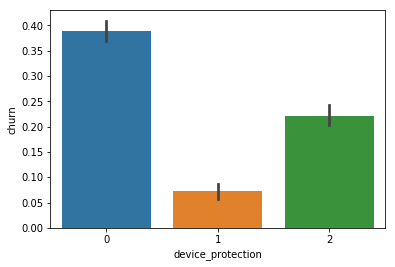

In [28]:
# barplot
ax = sns.barplot(x="device_protection", y="churn", data=train)

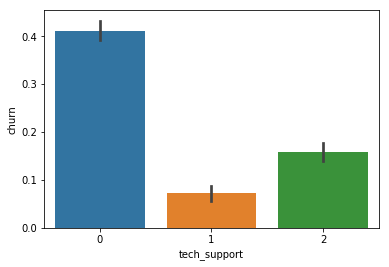

In [29]:
# barplot
ax = sns.barplot(x="tech_support", y="churn", data=train)

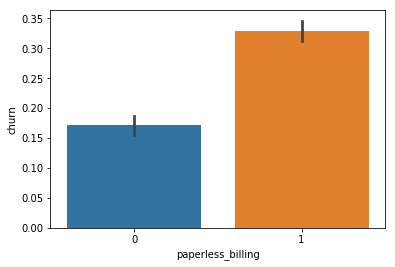

In [30]:
# barplot
ax = sns.barplot(x="paperless_billing", y="churn", data=train)

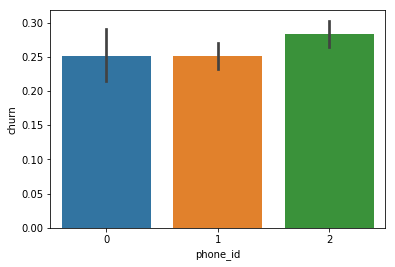

In [45]:
# barplot
ax = sns.barplot(x="phone_id", y="churn", data=train)

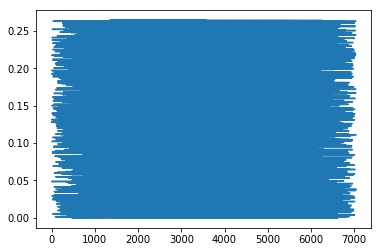

In [31]:
train.rate_churn.plot()

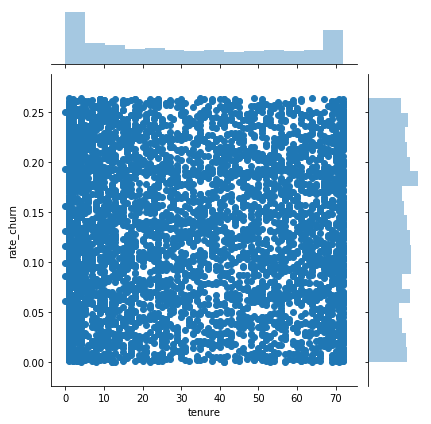

In [32]:
# joint plot
sns.jointplot(x=train.tenure, y=train.rate_churn, data=train)

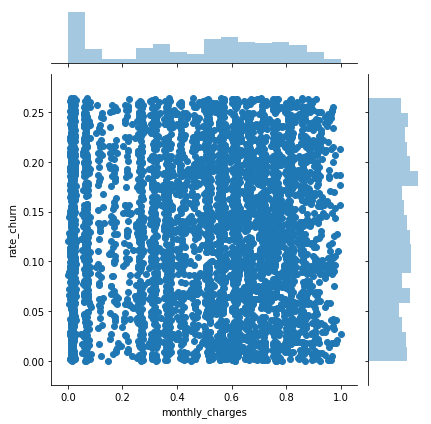

In [44]:
# joint plot
sns.jointplot(x=train.monthly_charges, y=train.rate_churn, data=train)

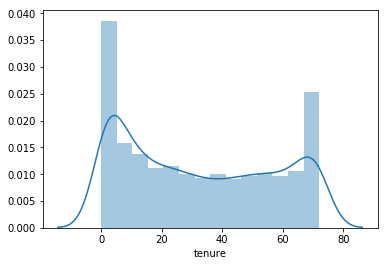

In [33]:
sns.distplot(train.tenure)

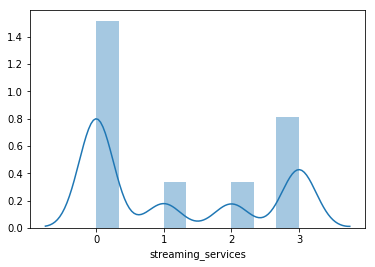

In [34]:
sns.distplot(train.streaming_services)

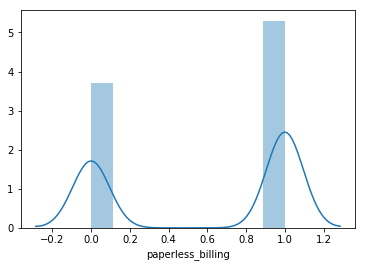

In [35]:
sns.distplot(train.paperless_billing)

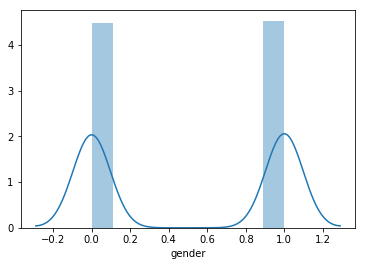

In [36]:
sns.distplot(train.gender)

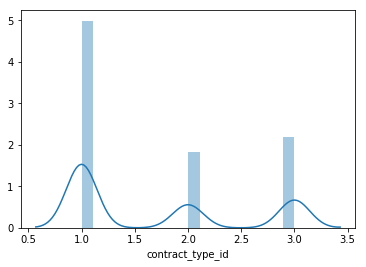

In [37]:
sns.distplot(train.contract_type_id)

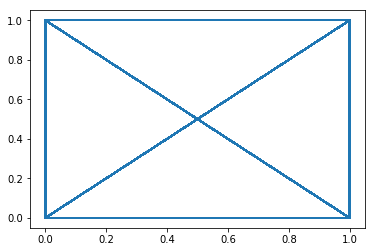

In [38]:
# plt.plot
plt.plot('gender', 'churn', data=train)

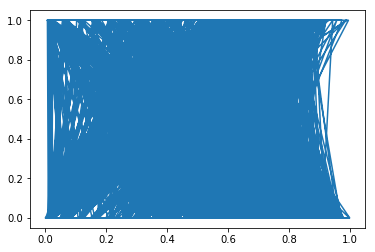

In [39]:
# plt.plot
plt.plot('monthly_charges', 'churn', data=train)

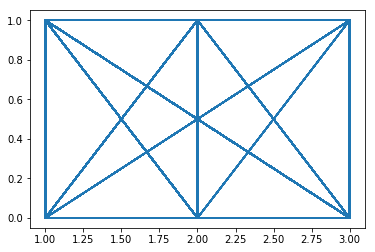

In [40]:
# plt.plot
plt.plot('contract_type_id', 'churn', data=train)

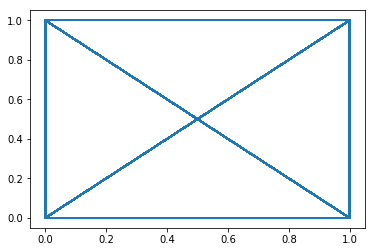

In [41]:
# plt.plot
plt.plot('paperless_billing', 'churn', data=train)

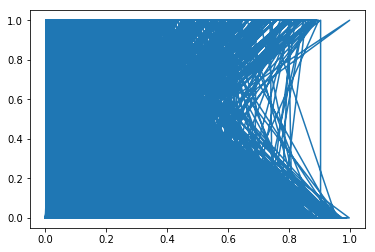

In [42]:
# plt.plot
plt.plot('total_charges', 'churn', data=train)

In [ ]:
# What can you say about each variable's relationship to churn, based on your initial exploration? If there appears
# to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document)
# ideas on reasons there could be correlation.
# According to the above, the variables that do not have a strong enough correlation(AKA the ones we can drop) are gender and phone_id.
# The variables that do have a significant effect on churn rate are contract_type_id, senior_citizen, household_type_id, 
# device_protection, tech_support, and paperless_billing
